# Lab 7.3: Introduction to Logistic Regression

**Question 1**

1) Write a Python function that computes the value of the logistic function.  

2) Define an array of values from -6 to 6 (using `numpy.linspace`), use the logistic function to obtain the probabilites, and plot the values (x) against the probabilities (y).
  

$$ \pi(1) = \frac{e^\beta}{1+e^\beta} $$

In [4]:
def logit(value):return e**value / (1+e**value)

In [13]:
from math import e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
logit(0)

0.5

In [11]:
num = [item for item  in np.linspace(-6,6,100)]

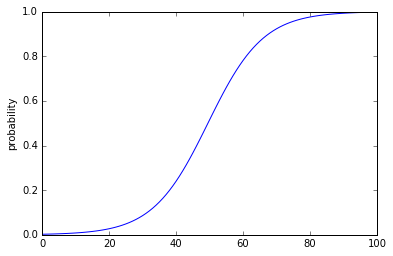

In [16]:
plt.plot([logit(value) for value in num])
plt.ylabel('probability');

**Question 2**

You are given a data set with a binary response (`Shot`) in the `flu` table. The response of 1 represents people who have taken flu shots, 0 represents people who have not. `Age` represents the the age of the person and `Health_aware` is a score of how health aware the person is.


1) As usual, make plots to explore your data. By inspecting the scatter matrix, guess if people who are more health aware would be more likely to have got flu shots and if people who are old would be more likely to have got flu shots.


2) Why would it be inappropriate to use linear regression for this problem ?

   
3) Fit the data to a logistic regression model. Logistic regression is fitted in a similar manner in Python as linear regression, except the function we use is `Logit`.
  
 
4) Do the regression coefficients confirm your guesses in Part 1)? Why or why not?   

5) How would you interpret the regression coefficients?

In [17]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

flu_df = pd.read_sql("SELECT * FROM flu;", engine)

Populating the interactive namespace from numpy and matplotlib


In [18]:
flu_df.head()

,patient_id,Shot,Age,Health_aware
0,0,0.0,38.0,40.0
1,1,1.0,52.0,60.0
2,2,0.0,41.0,36.0
3,3,1.0,46.0,59.0
4,4,1.0,41.0,70.0


In [27]:
flu_df.corr()

,patient_id,Shot,Age,Health_aware
patient_id,1.000000,-0.046332,0.114978,-0.103341
Shot,-0.046332,1.000000,0.466136,0.570090
Age,0.114978,0.466136,1.000000,0.024624
Health_aware,-0.103341,0.570090,0.024624,1.000000


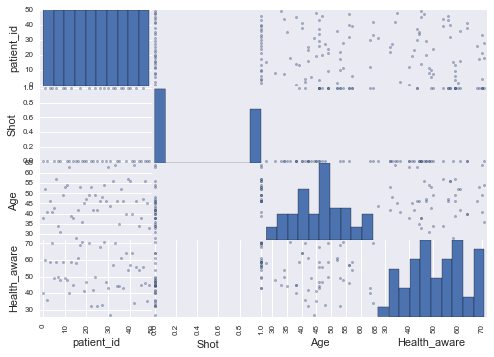

In [20]:
pd.scatter_matrix(flu_df);

In [21]:
import seaborn as sns

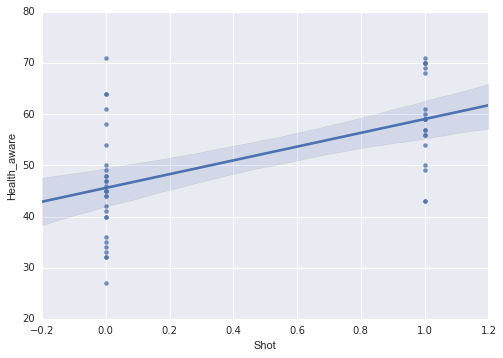

In [25]:
sns.regplot('Shot','Health_aware',flu_df)

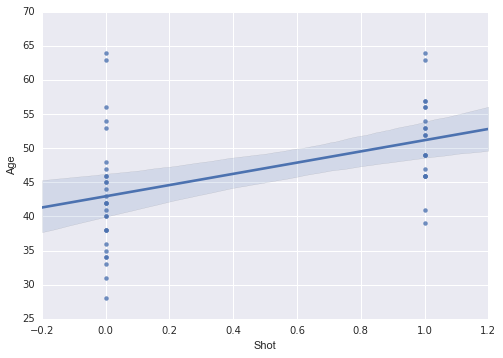

In [26]:
sns.regplot('Shot','Age',flu_df)

# 3

In [29]:
import statsmodels.api as smf

In [55]:
X = flu_df[['Age','Health_aware']]
y = flu_df['Shot']
X = smf.add_constant(X)

model = smf.Logit(y,X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.324163
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Shot   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.5235
Time:                        14:57:48   Log-Likelihood:                -16.208
converged:                       True   LL-Null:                       -34.015
                                        LLR p-value:                 1.848e-08
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -21.5846      6.418     -3.363      0.001       -34.164    -9.005
Age              0.2218      0.074      2.983      0.003         0.076     0.368
Health_aware     0.2035      0.063      3.244      0.001         0.081     0.326
================================================================================
"""

- The regression confirms our guess that Age and Health_aware are good predictors of the chance of receiving a shot. Both are significant (p <.05).

In [62]:
age_twenty = results.predict([1,52,60])
age_twenty_one = results.predict([1,51,50])
age_twenty

array([ 0.89643463])

**Question 3**  

The data set https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv has data on 61 married couples. The dependent variable is HAPPYMAR, respondent’s marital happiness (1 = Very Happy, 0 = Otherwise). CHURCH, Church attendance (1 = Often attends, 0 = other), FEMALE (1 = female, 0 = male), and EDUC, Years of education, are the explanatory variables.  

1) Run the logistic regression of happymar on church, female and educ.  

2) Are all three explanatory variables needed in the model?  

3) Based on the signs of the logistic regression coefficients (positive or negative), interpret their impact on the probability of a happy marriage. Any surprises?  

4) Determine the probability of marital happiness for: (a) a male with 8 years of education who is not a regular churchgoer (b) a male with 8 years of education who is a regular churchgoer (c) a female with 16 years of education who is not a regular churchgoer (d) a female with 16 years of education who is a regular churchgoer. 

In [64]:
married_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/lrb.csv')

In [65]:
married_df.head()

,happymar,church,female,educ
0,0,0,0,9
1,1,0,1,10
2,1,1,1,16
3,1,1,1,11
4,1,1,1,12


In [83]:
married_df.describe()

,happymar,church,female,educ
count,61.000000,61.000000,61.000000,61.000000
mean,0.639344,0.491803,0.573770,12.278689
std,0.484176,0.504082,0.498632,1.817793
min,0.000000,0.000000,0.000000,7.000000
25%,0.000000,0.000000,0.000000,12.000000
50%,1.000000,0.000000,1.000000,12.000000
75%,1.000000,1.000000,1.000000,13.000000
max,1.000000,1.000000,1.000000,17.000000


In [78]:
married_df.corr()

,happymar,church,female,educ
happymar,1.000000,0.465702,0.319143,0.381215
church,0.465702,1.000000,-0.080440,0.266272
female,0.319143,-0.080440,1.000000,0.114847
educ,0.381215,0.266272,0.114847,1.000000


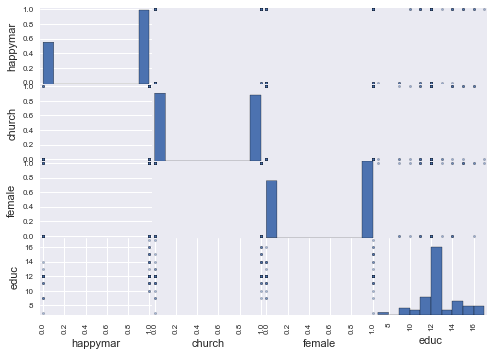

In [67]:
pd.scatter_matrix(married_df);

In [77]:
X2 = married_df[['church','female','educ']]
X2= sm.add_constant(X2)
y2 = married_df['happymar']

model2 = smf.Logit(y2,X2)
results2 = model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.403833
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               happymar   No. Observations:                   61
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                  0.3823
Time:                        15:12:23   Log-Likelihood:                -24.634
converged:                       True   LL-Null:                       -39.881
                                        LLR p-value:                 1.086e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.1586      3.285     -2.483      0.013       -14.598    -1.719
church         2.9075      0.921      3.158      0.002         1.103     4.712
female         2.3945      0.877      2.729      0.006         0.675     4.114
educ           0.5267      0.265      1.986      0.047         0.007     1.046
==============================================================================
"""

> Yes, we need all three explanatory variables 

: (a) a male with 8 years of education who is not a regular churchgoer (b) a male with 8 years of education who is a regular churchgoer (c) a female with 16 years of education who is not a regular churchgoer (d) a female with 16 years of education who is a regular churchgoer.

In [82]:
results2.predict([1,0,0,8])

array([ 0.01898259])

In [86]:
results2.predict([1,1,0,8])

array([ 0.2616268])

In [84]:
results2.predict([1,0,1,16])

array([ 0.93480371])

In [85]:
results2.predict([1,1,1,16])

array([ 0.99620577])